In [1]:
import os
os.chdir('../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [2]:
X_drug, X_target, y = load_process_DAVIS('./data/', binary=True)

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

Beginning Processing...
Beginning to extract zip file...
Default binary threshold for the binding affinity scores are 30, you can adjust it by using the "threshold" parameter
Done!
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
protein encoding finished...
splitting dataset...
Done.


In [3]:
# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )

Let's use 1 GPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69403857
Validation at Epoch 1 , AUROC: 0.7636400901824144 , AUPRC: 0.16826621955981202 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.12913653
Validation at Epoch 2 , AUROC: 0.8419476327116213 , AUPRC: 0.30344635054864355 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.21572796
Validation at Epoch 3 , AUROC: 0.8387220741955318 , AUPRC: 0.30598321657052374 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.14563164
Validation at Epoch 4 , AUROC: 0.8509146341463415 , AUPRC: 0.31637410466513377 , F1: 0.0547945205479452
Training at Epoch 5 iteration 0 with loss 0.1452313
Validation at Epoch 5 , AUROC: 0.8490648698503792 , AUPRC: 0.33100461183944246 , F1: 0.2962962962962963
Training at Epoch 6 iteration 0 with loss 0.13702923
Validation at Epoch 6 , AUROC: 0.85576706292273 , AUPRC: 0.3491745417930331 , F1: 0.2967032967032967
Training at Epoch 7 iteration 0 with lo

Training at Epoch 53 iteration 0 with loss 0.03376828
Validation at Epoch 53 , AUROC: 0.937210493953679 , AUPRC: 0.5418339983477827 , F1: 0.5217391304347825
Training at Epoch 54 iteration 0 with loss 0.024219895
Validation at Epoch 54 , AUROC: 0.9386298421807746 , AUPRC: 0.5222720002941696 , F1: 0.4836065573770492
Training at Epoch 55 iteration 0 with loss 0.0301464
Validation at Epoch 55 , AUROC: 0.9332803853248616 , AUPRC: 0.5173871664260096 , F1: 0.5037037037037037
Training at Epoch 56 iteration 0 with loss 0.021212561
Validation at Epoch 56 , AUROC: 0.9371669399467104 , AUPRC: 0.5239589621462077 , F1: 0.43946188340807174
Training at Epoch 57 iteration 0 with loss 0.039023615
Validation at Epoch 57 , AUROC: 0.9352608116417298 , AUPRC: 0.5261320356960077 , F1: 0.49137931034482757
Training at Epoch 58 iteration 0 with loss 0.029012958
Validation at Epoch 58 , AUROC: 0.9394189383070302 , AUPRC: 0.5570794763794581 , F1: 0.49811320754716976
Training at Epoch 59 iteration 0 with loss 0.02

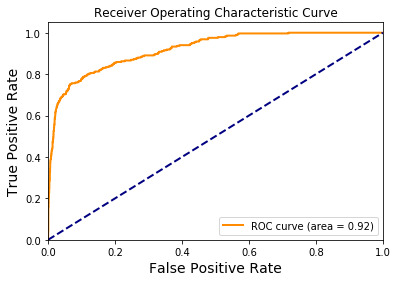

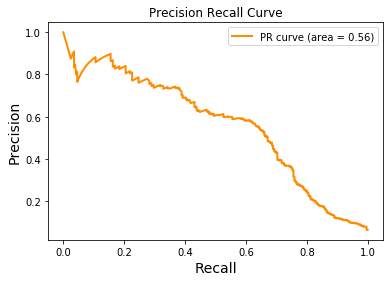

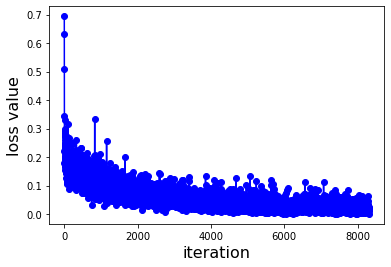

In [4]:
model = models.model_initialize(**config)
model.train(train, val, test)